# Ray tracing with Gaussian beams #
This is a demonstration file for the course PH455/957. The script demonstrates how to implement a singe propagation step for a Gaussian beam.

In [14]:
import numpy as np                     # numpy arrays
import matplotlib.pyplot as plt        # plotting
import PH455

## (1) Define an initial Gaussian beam. Provide W1, R1 and calculate q1. ##

In [16]:
lam = 500e-9 * 1000    # wavelength in mm
R1  = -2               # Radius of curvature in mm
W1  = 0.5              # Waist in mm
z1  = -2               # Position in mm   

### Calculate q1 using W1, R1

In [18]:
invQ = 1/R1 - 1j *lam / (np.pi*W1**2)
q1   = 1/invQ

## (2) Define the ABCD matrix. Here, a free space propagation by distance d.

In [21]:
d  = 1                            # 1 mm    
M  = np.array( [[1,d],[0,1]] )    # see slides for matrix

"multiply" the matrix with q1, use application rule

In [23]:
q2 = (M[0][0]*q1 + M[0][1]) / (M[1][0]*q1 + M[1][1])

## (3) Calculate the new waist and radius using q2 at position z2 ##

In [28]:
z2  = z1 + d             # propagate by distance d

invQ = 1/q2              # calculate 1/q2  

R2 = 1/np.real(invQ)     # calculate R2, W2
W2 = np.sqrt( -lam / (np.pi*np.imag(invQ) ) )

## (4) Plot the beam ##
- "showBeam( zVec, beamVect, lambda )" is a simple plotting function in the support module PH455.
- horizontal gray line - optical axis
- red circles - y-positions of beam width
- blue lines - radius of curvature of wavefronts
- dashed red lines - connection of width values

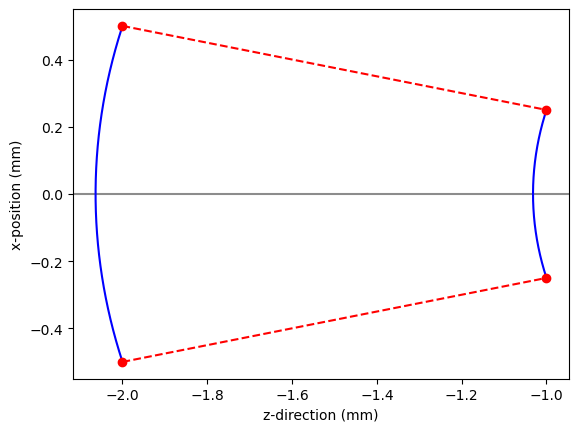

In [32]:
PH455.showBeam( [z1,z2], [q1, q2], lam )